In [1]:
#!pip install xgboost

In [2]:
#conda install -c conda-forge xgboost

Retrieving notices: ...working... done
done
Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::holoviews==1.15.0=py39hecd8cb5_0
  - defaults/noarch::tifffile==2021.7.2=pyhd3eb1b0_2
  - defaults/osx-64::imageio==2.19.3=py39hecd8cb5_0
  - defaults/osx-64::scikit-learn==1.0.2=py39hae1ba45_1
  - defaults/osx-64::bottleneck==1.3.5=py39h67323c0_0
  - defaults/osx-64::scikit-image==0.19.2=py39hae1ba45_0
  - defaults/osx-64::datashape==0.5.4=py39hecd8cb5_1
  - defaults/osx-64::mkl_random==1.2.2=py39hb2f4e1b_0
  - defaults/osx-64::numexpr==2.8.3=py39h2e5f0a9_0
  - defaults/osx-64::imagecodecs==2021.8.26=py39h0f85e6e_1
  - defaults/osx-64::h5py==3.7.0=py39h4a1dd59_0
  - defaults/osx-64::pywavelets==1.3.0=py39hca72f7f_0
  - defaults/osx-64::scikit-learn-intelex==2021.6.0=py39hecd8cb5_0
  - defaults/osx-64::numpy==1.21.5=py39h2e5f0a9_3
  - defaults/osx-64::datashader==0.14.1=py

_anaconda_depends-20 | 69 KB     |                                       |   0% 

openssl-1.1.1w       | 1.7 MB    | 3                                     |   1% 



certifi-2024.2.2     | 157 KB    | ###7                                  |  10% 

openssl-1.1.1w       | 1.7 MB    | ################                      |  43% 



certifi-2024.2.2     | 157 KB    | ##################################### | 100% 



certifi-2024.2.2     | 157 KB    | ##################################### | 100% 
anaconda-custom      | 13 KB     | ##################################### | 100% 

openssl-1.1.1w       | 1.7 MB    | ##################################### | 100% 

openssl-1.1.1w       | 1.7 MB    | ##################################### | 100% 
anaconda-custom      | 13 KB     | ##################################### | 100% 


ca-certificates-2024 | 152 KB    | ###8                                  |  11% 




_anaconda_depends-20 | 69 KB     | ########5                             |  23% 


pip-24.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-Processsing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Classifier Libraries
from sklearn.linear_model import SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 
from sklearn.svm import LinearSVC, SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/Users/chuka/Exercises/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Features in the dataset and meaning:


• age - age in years,
• sex - (1 = male; 0 = female),
• cp - chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic),
• trestbps - resting blood pressure (in mm Hg on admission to the hospital),
• chol - serum cholestoral in mg/d,
• fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false),
• restecg - resting electrocardiographic results,
• thalach - maximum heart rate achieved.
• exang - exercise induced angina (1 = yes; 0 = no),
• oldpeak - ST depression induced by exercise relative to rest,
• slope - the slope of the peak exercise ST segment,
• ca - number of major vessels (0-3) colored by flourosopy,
• thal - 3 = normal; 6 = fixed defect; 7 = reversable defect,
• target - have disease or not (1=yes, 0=no).

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#For better understanding and flow of analysis, i will rename some of the columns
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'number_major_vessels', 'thalassemia', 'target']

df.head()      

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,number_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  number_major_vessels     303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [8]:
print(df.isnull().sum())

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
number_major_vessels       0
thalassemia                0
target                     0
dtype: int64


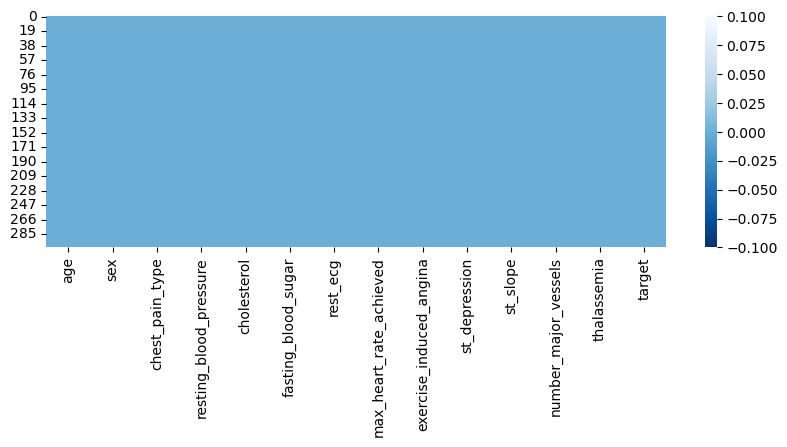

In [9]:
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar = True, cmap = 'Blues_r');

## EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

In [10]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'number_major_vessels', 'thalassemia', 'target'],
      dtype='object')

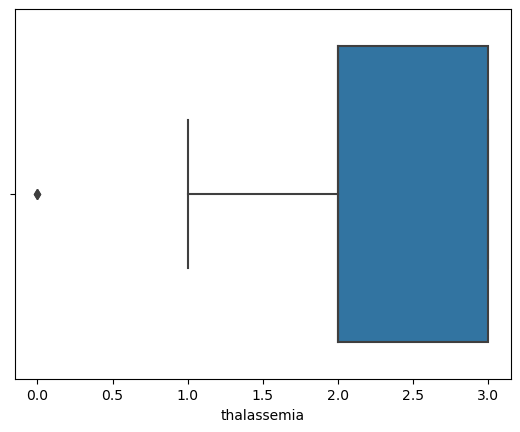

In [11]:
sns.boxplot(x = df['thalassemia']);

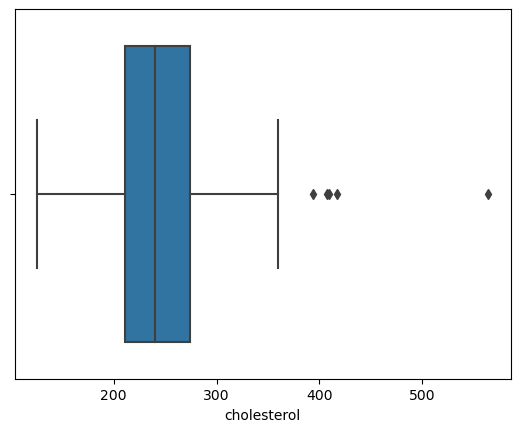

In [12]:
sns.boxplot(x = df['cholesterol']);

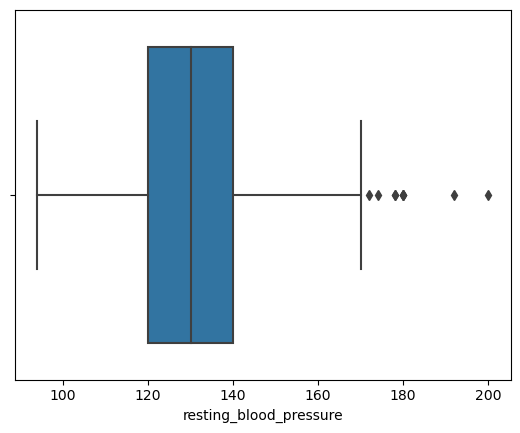

In [13]:
sns.boxplot(x = df['resting_blood_pressure']);

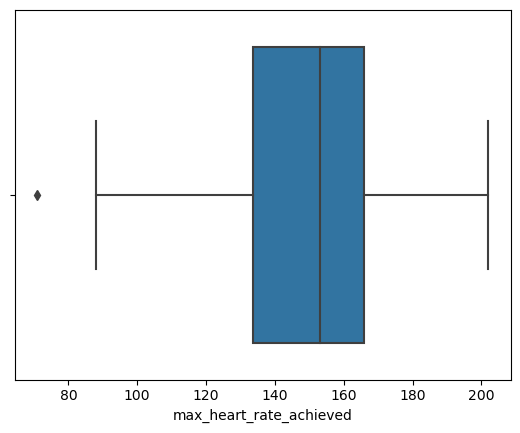

In [14]:
sns.boxplot(x = df['max_heart_rate_achieved']);

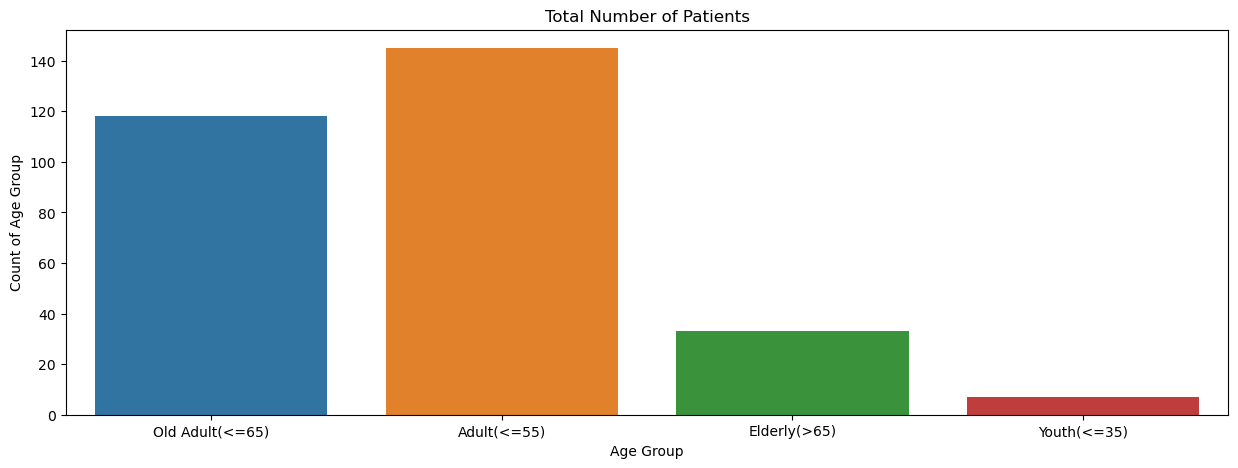

In [15]:
#Data Visualization
#Age_bracket

def age_bracket (age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)" 
    else:
        return "Elderly(>65)"

df['age_bracket'] = df['age'].apply(age_bracket)


#Visualizations

plt.figure(figsize = (15,5))
ax = sns.countplot(x = 'age_bracket', data = df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients');

In [16]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,number_major_vessels,thalassemia,target,age_bracket
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65)
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55)
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55)
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65)
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65)


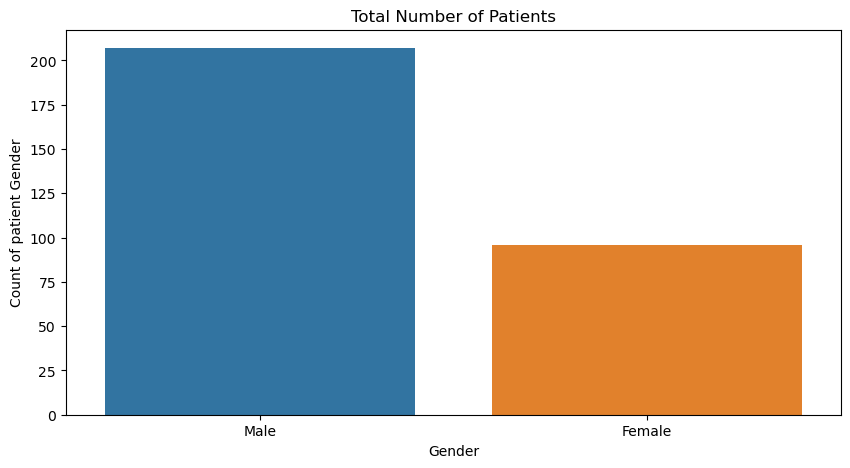

In [17]:
def gender (sex):
    if sex == 1:
        return "Male" 
    else:
        return "Female"


df['gender'] = df['sex'].apply(gender)

#Investigating the gender of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='gender', data=df)
plt.xlabel ('Gender')
plt.ylabel ('Count of patient Gender') 
plt.title('Total Number of Patients');

In [18]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,number_major_vessels,thalassemia,target,age_bracket,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female


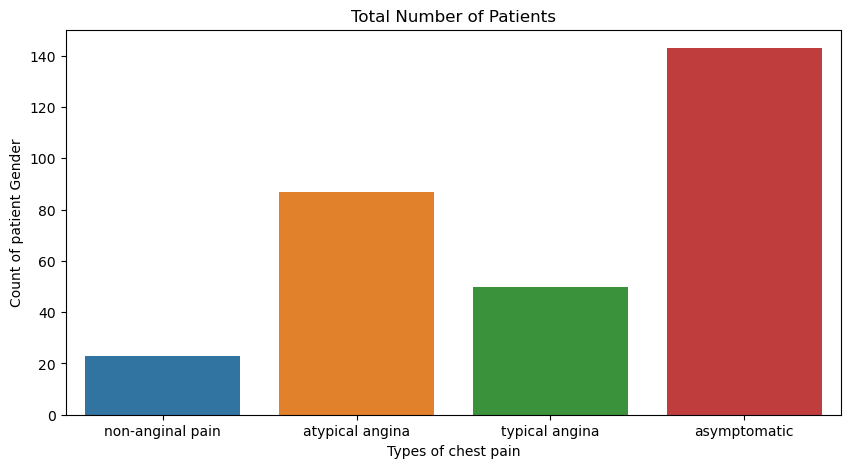

In [19]:
# Data Visualization
# chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4; asymptomatic)

def chest_pain(cp):
    if cp == 1:
        return "typical angina"
    elif cp == 2:
        return "atypical angina"
    elif cp == 3:
        return "non-anginal pain"
    return "asymptomatic"

df['cp_cat'] = df["chest_pain_type"].apply(chest_pain)


#Investigating the gender of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='cp_cat', data=df)
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patient Gender') 
plt.title('Total Number of Patients');

Yes    165
No     138
Name: label, dtype: int64


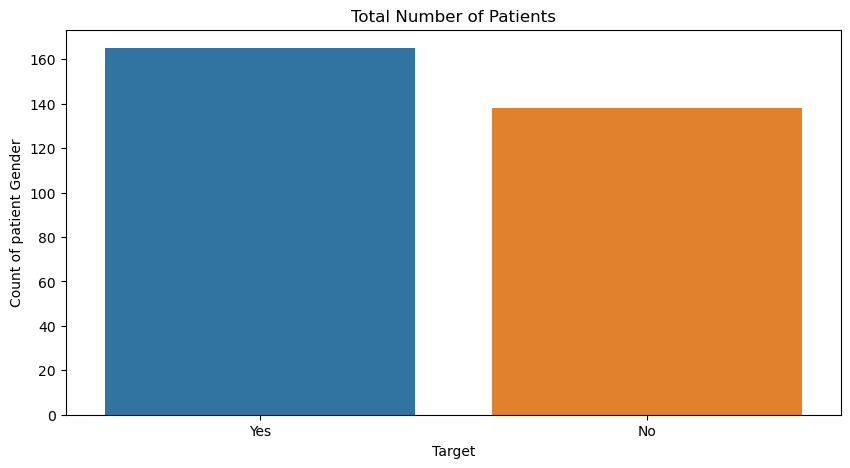

In [20]:
# Data Visualization
# target - have disease or not (1=yes, 0=no)

def label(tg):
    if tg == 1:
        return "Yes" 
    else:
        return "No"


df['label'] = df['target'].apply(label)

# Total patient in each category
print(df["label"].value_counts())

#Investigating the gender of patients
plt.figure(figsize = (10, 5))
sns.countplot(x ='label', data=df)
plt.xlabel('Target')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients');

# BIVARIATE ANALYSIS

In [21]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,number_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Yes


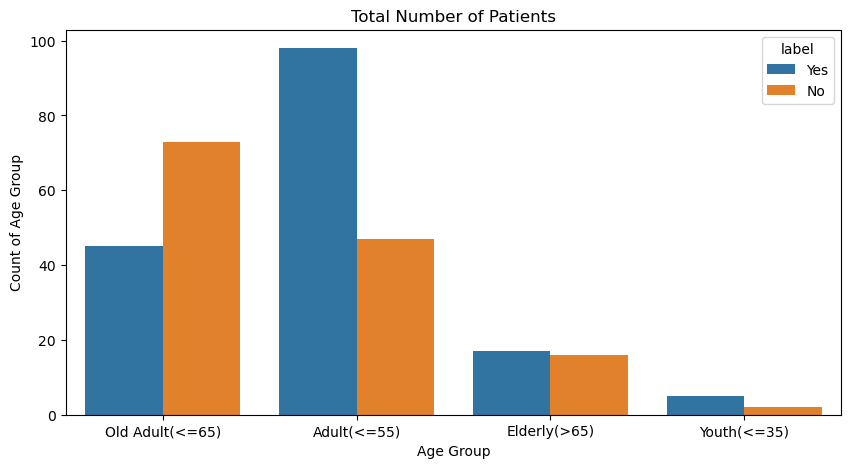

In [22]:
#Investigating the age group of patients by the target feature
plt.figure(figsize = (10, 5))
sns.countplot(x ='age_bracket', data=df, hue='label')
plt.xlabel ('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients');

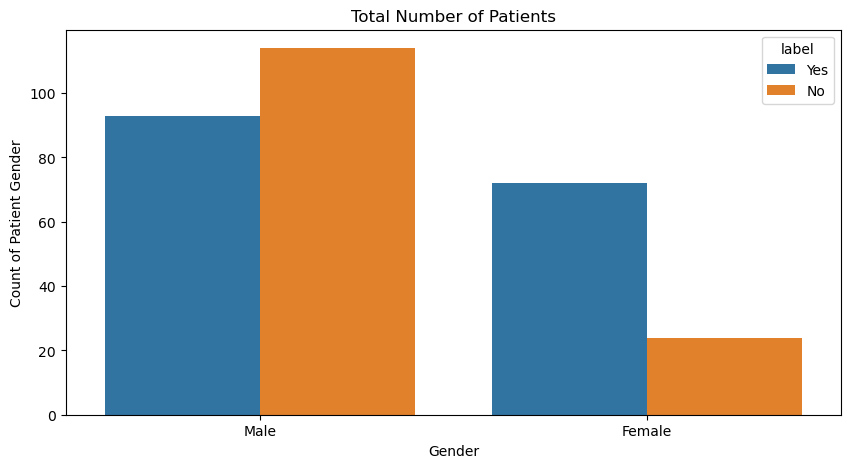

In [23]:
#Investigating the gender of patients by the target feature
plt.figure(figsize = (10, 5))
sns.countplot(x='gender', data=df, hue='label')
plt.xlabel ('Gender')
plt.ylabel('Count of Patient Gender')
plt.title('Total Number of Patients');

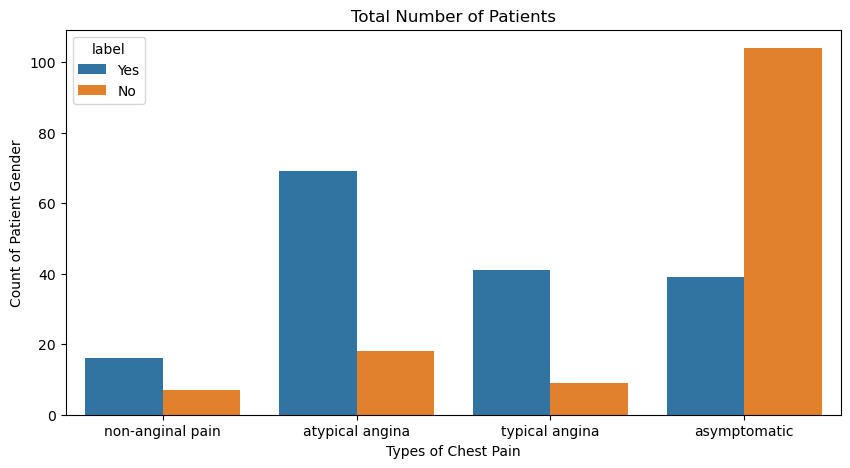

In [24]:
# Investigating the gender of patients by the target feature
plt.figure(figsize = (10, 5))
sns.countplot(x = 'cp_cat', data = df, hue = 'label')
plt.xlabel('Types of Chest Pain')
plt.ylabel('Count of Patient Gender')
plt.title('Total Number of Patients');

# MULTIVARIATE ANALYSIS

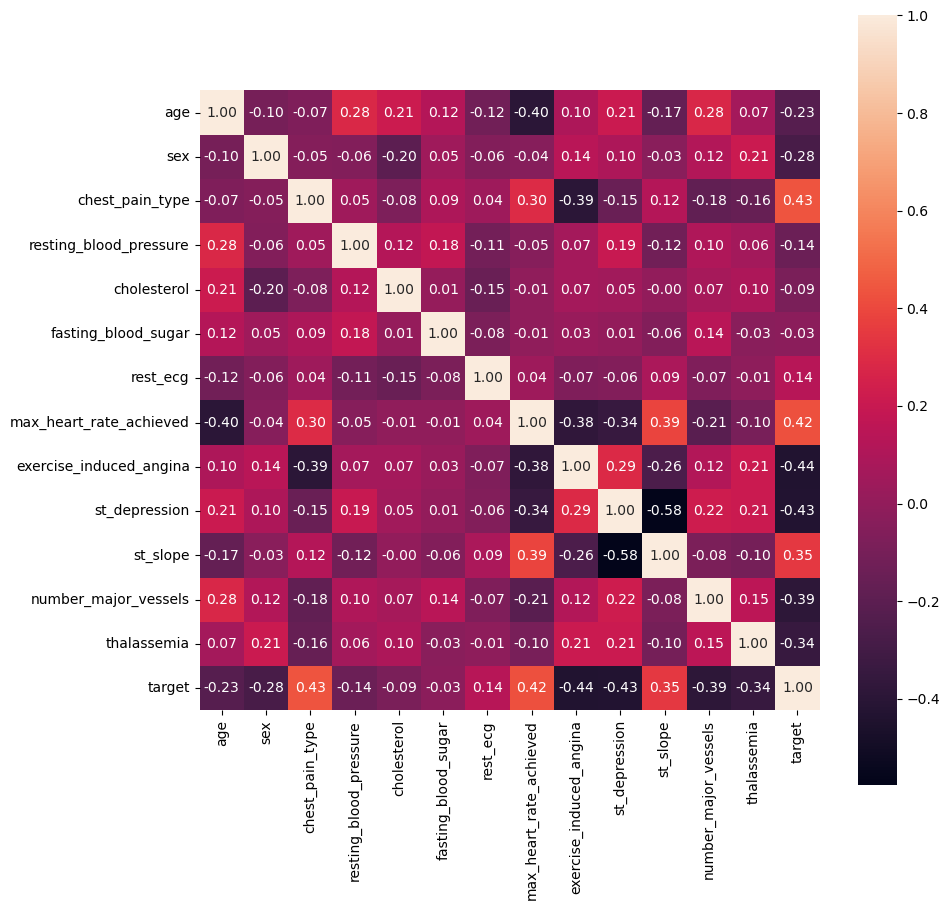

In [25]:
#Correlation between SalePrice and other variables in the dataset
plt.figure(figsize = (10, 10))
hm = sns.heatmap(df.corr(), cbar=True, annot=True, square = True, fmt= '.2f', annot_kws={'size': 10})

## FEATURE ENGINEERING/DATA PREPROCESSING

In [26]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,number_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Yes


In [27]:
# Create a copy of the data (Exclude target/Label alongside other columns that was created)

df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'number_major_vessels', 'thalassemia']]

label = df[['target']]

In [28]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,number_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [29]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [30]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
number_major_vessels         int64
thalassemia                  int64
dtype: object

In [31]:
# Dealing with Outliers - resting_blood_pressure', 'cholesterol', 'thalassemia'
# Nommalize the data
scaler = MinMaxScaler()

df1["Scaled RBP"] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1, 1))
df1["Scaled_chol"] = scaler.fit_transform(df1[['cholesterol']].values.reshape(-1, 1))
df1["Scaled_thal"] = scaler.fit_transform(df1[['thalassemia']].values.reshape(-1, 1))
df1["Scaled_max_heart_rate"] = scaler.fit_transform(df1[['max_heart_rate_achieved']].values.reshape(-1, 1))


df1.drop(['resting_blood_pressure', 'thalassemia', 'cholesterol', 'max_heart_rate_achieved'], axis=1, inplace=True)
df1.head ()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,number_major_vessels,Scaled RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


# MACHINE LEARNING 

In [32]:
# Split the dataset into training and testing sets, X - Questions, y = Answers

X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [33]:
X_train.head(3)

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,number_major_vessels,Scaled RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153


In [34]:
y_train.head(3)

,target
132,1
202,0
196,0


In [35]:
# Model Building
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train) 

ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print ("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print ("AUC-ROC:", roc_auc_score(y_test,ly_pred))

Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1-score: 0.8571428571428571
AUC-ROC: 0.8529094827586207


In [36]:
#Predictions

ly_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

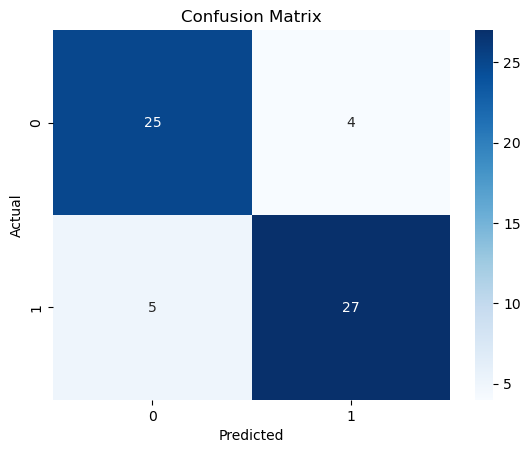

In [37]:
# Create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [38]:
# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)


print("Random Forest Classification")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print ("Recall:", recall_score(y_test, rfy_pred))
print ("F1-score:", f1_score(y_test, rfy_pred))
print ("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Random Forest Classification
Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1-score: 0.8615384615384615
AUC-ROC: 0.8512931034482758


In [39]:
rfy_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

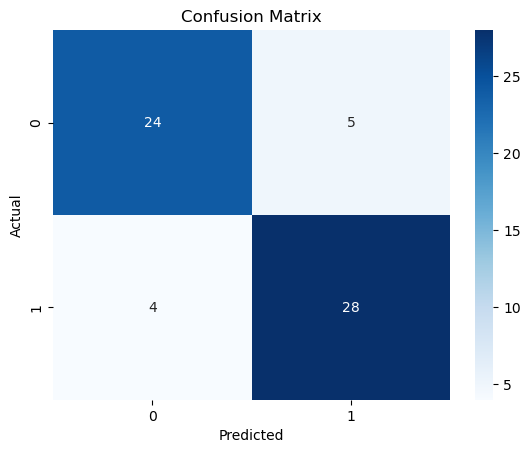

In [40]:
# Create a confusion matrix
rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix


sns.heatmap (rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel ("Predicted") 
plt.ylabel ("Actual")
plt.title("Confusion Matrix")
plt.show()

In [41]:
#8 Machine Learning Algorithms will be applied to the dataset

classifiers =  [[XGBClassifier(),'XGB Classifier'],
                [RandomForestClassifier(), 'Random Forest'],
                [KNeighborsClassifier(),'K-Nearest Neighbours'], 
                [SGDClassifier(), 'SGD Classifier'],
                [SVC(), 'SVC'],
                [GaussianNB(), "Naive Bayes"],
                [DecisionTreeClassifier(random_state = 42), "Decison tree"],
                [LogisticRegression(), 'Logistic Regression']
               
              ]

In [42]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbours'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeClassi

In [43]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict (X_test)
    
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    
    acc_list[model_name] = ([str(round(a_score*100,2)) + '%' ])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print(" ")

In [44]:
print ("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,83.61%,86.89%,75.41%,78.69%,65.57%,86.89%,85.25%,85.25%


In [45]:
print ("Precision Score")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,86.67%,85.29%,79.31%,88.0%,65.71%,90.0%,92.59%,87.1%


In [46]:
print ("Recall Score")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,81.25%,90.62%,71.88%,68.75%,71.88%,84.38%,78.12%,84.38%


In [47]:
print ("ROC Score")
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decison tree,Logistic Regression
0,83.73%,86.69%,75.59%,79.2%,65.25%,87.02%,85.61%,85.29%
